# **Ad Ease**
- is an ads and marketing based company helping businesses elicit maximum clicks at minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically.
- The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

## **Problem Statement:**
* To understand the per page view report for different wikipedia pages for 550 days.
* To forecast the number of views to predict and optimize the ad placement for clients  
* To provide clients (different regions) with data on how their ads will perform on pages in different languages

In [5]:
# Importing required packages for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [6]:
# Initial pandas & matplotlib setup

pd.options.display.max_rows = 200
pd.options.display.max_columns = 600
pd.options.display.max_colwidth = 200

np.set_printoptions(precision=2,suppress=True)

#to suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

plt.rcParams["figure.figsize"] = (20,6)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
# Importing the given dataset to pandas dataframe
data = pd.read_csv("train_1.csv")
df = data.copy()
df.head(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2

In [9]:
# Load the exogenous varaible info
exog = pd.read_csv("Exog_Campaign_eng")
exog.shape

(550, 1)

In [10]:
# Lets look at the distribution
exog.value_counts()

,count
Exog,
0,496
1,54


In [11]:
# To get the shape of the dataset
print(f"Number of records : {df.shape[0]}")
print(f"Total Features:  {df.shape[1]}")

Number of records : 145063
Total Features:  551


In [12]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [13]:
# Let's find max percentage of missing values
np.round((df.isna().sum()/df.shape[0]).max()*100)

np.float64(14.0)

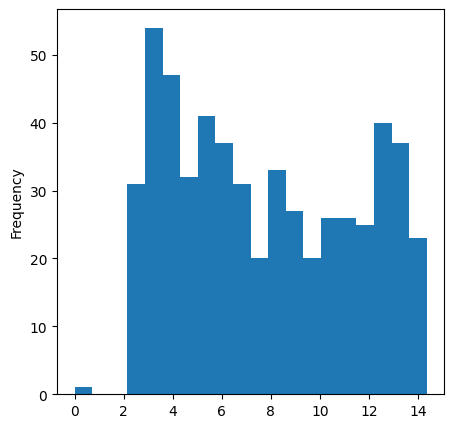

In [14]:
# Lets plot the distribution of null values
plt.figure(figsize=(5,5))
(df.isna().sum()*100/df.shape[0]).plot(kind="hist",bins=20)
plt.show();

### Insights:
1. There is one feature of type object & rest of 550 features are float type
2. Maximum percentage of missing values in a feature is ~14 %
3. Above shows the histogram of % null values in different columns

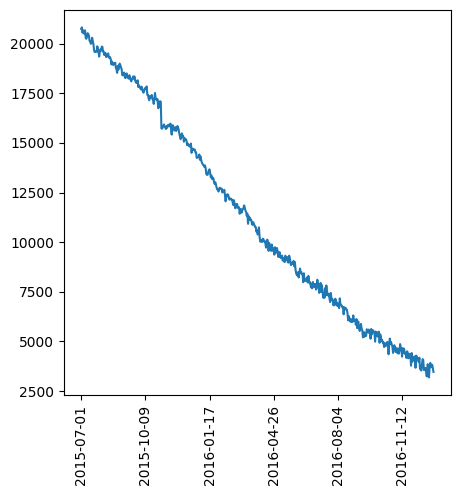

In [15]:
# Null values for different dates
plt.figure(figsize=(5,5))
df.iloc[:,1:].isna().sum(axis=0).plot()
plt.xticks(rotation=90)
plt.show()

## Insights:
1. Above plot implies that all pages do not have views data starting from 07/01/2015
2. As we approach Year 2016, we have less and less null data  
3. It could mean different things. Data isn't captured, Page didn't exist those days, or No one visited the page those days
4. For this analysis, I will perform interpolation using forward method so that initial null values remain as null

In [16]:
# Get the date range of columns
start_date, end_date = df.columns[1:].min(), df.columns[1:].max()
print(f"Columns date range: {start_date} till {end_date}")

Columns date range: 2015-07-01 till 2016-12-31


### Insights:
1. There are 550 days of per day views data for roughly 145,000 pages from different languages
2. We have per day view data starting from 2015-07-01 till 2016-12-26

In [17]:
## Drop duplicates if available
df = df.drop_duplicates()
df.shape

(145063, 551)

In [18]:
# Drop all the rows where views for all dates are missing
df = df[~((df.isna().sum(axis=1) == 550))].copy()
df.shape

(144411, 551)

### Insights:
1. There are no duplicates in the dataset
2. 0.45% (652) pages have all values as Null. Therefore dropped those pages

### Data Checks:

In [19]:
# To check to see if we have all dates in columns - generate the date range
# Compare it with the columns of the dataset

_range = pd.date_range(start=start_date,end=end_date,freq="D")
print(f"Date mismataches: {(df.columns[1:] != _range).sum()}")

Date mismataches: 0


### Insights:
1. Regardless of the null values, we have a column for each date. This check is to prevent issues during modelling

In [20]:
# Check the format of Page feature
df.iloc[[77573,42243,1],0]

,Page
77912,Category:Threesome_commons.wikimedia.org_mobile-web_all-agents
42409,Help:Images/fr_www.mediawiki.org_desktop_all-agents
1,2PM_zh.wikipedia.org_all-access_spider


### Insights:
1. There are also pages that do not comply with format: SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN
2. As shown above, there are also pages from commons.wikimedia & mediawiki. Simple google search shows the commons.wikimedia & Mediawiki is a media file repository. - These pages seem to have multilingual capabilities. For this analysis, we can assume language is unknown

In [21]:
def extract_features(df):

    import re
    pattern = r"([a-z]{2}).wikipedia.org"

    tempDf = df.Page.str.rsplit("_",n=2,expand=True)

    df.loc[:,"AccessType"] = tempDf[1]
    df.loc[:,"AccessOrigin"] = tempDf[2]
    df.loc[:,"Language"] = df.Page.str.extract(pattern)
    df.loc[:,"Org"] = tempDf[0].str.rsplit("_",n=1,expand=True).loc[:,1]
    df.loc[:,"PageName"] = tempDf[0].str.rsplit("_",n=1,expand=True).loc[:,0]

    return df

In [22]:
# Using the above function, lets extract the features like Language, AccessType, AccessOrigin, PageName from Page
data = extract_features(df)

# To change datatypes back to float for date features
for col in data.columns[1:-5]:
    data[col] = data[col].astype("float")

In [23]:
# Replace null values in Language with "unknown"
data["Language"].fillna("Unknown",inplace=True)

In [24]:
# Create a map to replace the language code with corresponding language

language_map = {
    "en": "English",
    "ja": "Japanese",
    "de": "German",
    "fr": "French",
    "zh": "Chinese",
    "ru": "Russian",
    "es": "Spanish"
}

data["Language"] = data["Language"].replace(to_replace=language_map)

In [25]:
data["Language"].unique()

array(['Chinese', 'French', 'English', 'Unknown', 'Russian', 'German',
       'Japanese', 'Spanish'], dtype=object)

### Insights:
1. There are pages from 7 differnt languages as shown above. Unknown is filled in for pages from commons.wikimedia & mediawiki pages

### Univariate Analysis:

In [26]:
# Pages proportion by language
data["Language"].value_counts()*100/data.shape[0]

,count
Language,
English,16.63
Japanese,14.08
German,12.77
French,12.30
Unknown,12.28
Chinese,11.84
Russian,10.38
Spanish,9.72


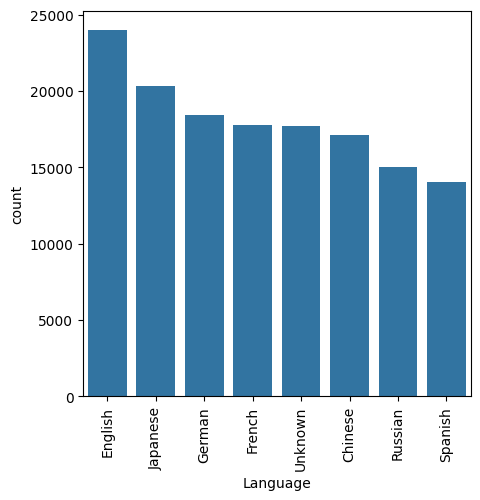

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="Language",order=data["Language"].value_counts().index)
plt.xticks(rotation=90);

### Insights:
1. ~ 17% of the pages are in English. Closely followed by Japanese ~14%
2. Rest of the languages have almost equal proportion of ~12%

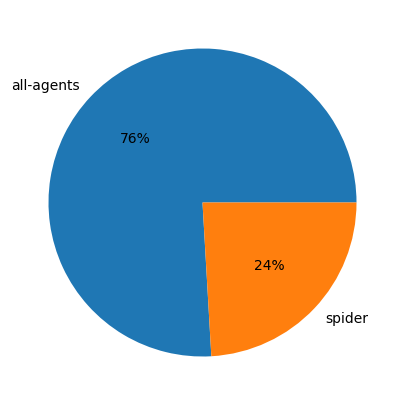

In [28]:
# pie plot to analyze the distribution
plt.figure(figsize=(5,5))

labels = data["AccessOrigin"].value_counts().index
counts = data["AccessOrigin"].value_counts().values

plt.pie(counts,labels=labels,autopct='%1.0f%%');

### Insights:
1. AccessOrigin is spider for ~24% of the pages and all-agents for ~76%

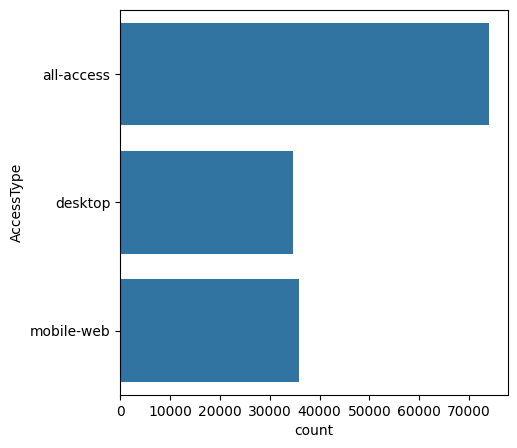

In [29]:
# count plot
plt.figure(figsize=(5,5))
sns.countplot(y=data["AccessType"]);

### Insights:
1. AccessType is all-acess for about 50% of the pages. Then for desktop & mobile-web is ~25% each

### Bivariate Analysis:

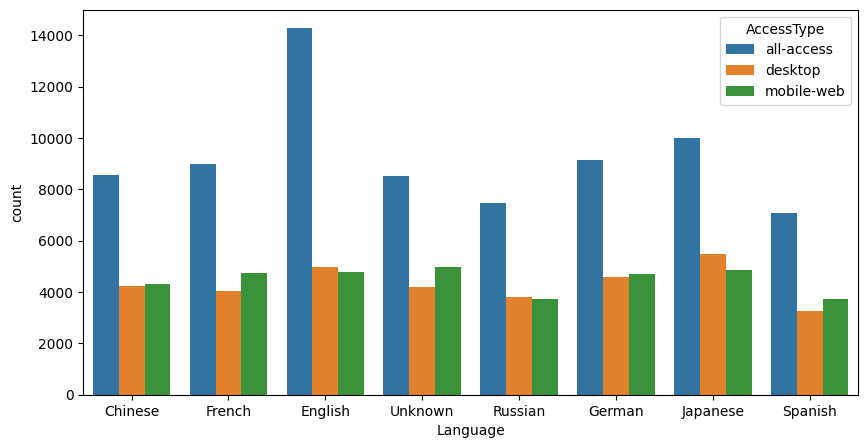

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x="Language",hue="AccessType");

### Insights:
1. English has more pages with AccessType of all-access, different from the rest

### Data Aggregation & Preparation for Timeseries Modelling:

In [31]:
# Interpolate the data with linear method
interpolated_data = data.copy(deep=True)
interpolated_data.iloc[:,1:-5] = data.iloc[:,1:-5].interpolate(axis=1,limit_direction="forward",method="linear")

In [32]:
# Aggregate the pages by language & computes means
agg_data_means = interpolated_data.groupby(by="Language")[interpolated_data.columns[1:-5]].mean().T
agg_data_means.drop(columns=["Unknown"],inplace=True)
agg_data_means.index = pd.to_datetime(agg_data_means.index)

In [33]:
# Aggregate the pages by language & computes medians
agg_data_medians = interpolated_data.groupby(by="Language")[interpolated_data.columns[1:-5]].median().T
agg_data_medians.drop(columns=["Unknown"],inplace=True)
agg_data_medians.index = pd.to_datetime(agg_data_medians.index)

In [34]:
# Aggregate the pages by language & computes sum
agg_data_sum = interpolated_data.groupby(by="Language")[interpolated_data.columns[1:-5]].sum().T
agg_data_sum.drop(columns=["Unknown"],inplace=True)
agg_data_sum.index = pd.to_datetime(agg_data_sum.index)

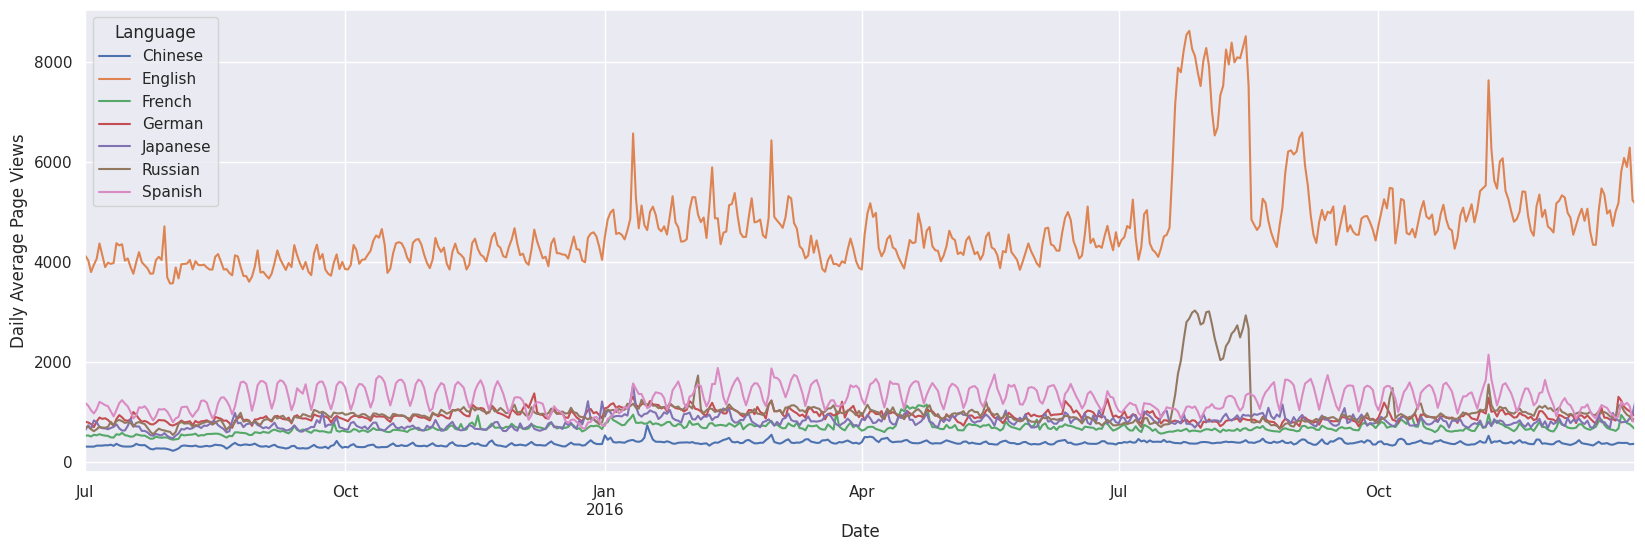

In [35]:
sns.set_theme()
agg_data_means.plot()
plt.xlabel("Date")
plt.ylabel("Daily Average Page Views");

### Insights:
1. During the months of August 2016, there is a spike in daily average views of both English & Russian pages
2. Also, a spike is observed in Nov,2016. This time for pages in Spanish, Russian, and German as well
3. English average views seem to have trend & seasonality where as other languages have seasonality mostly.

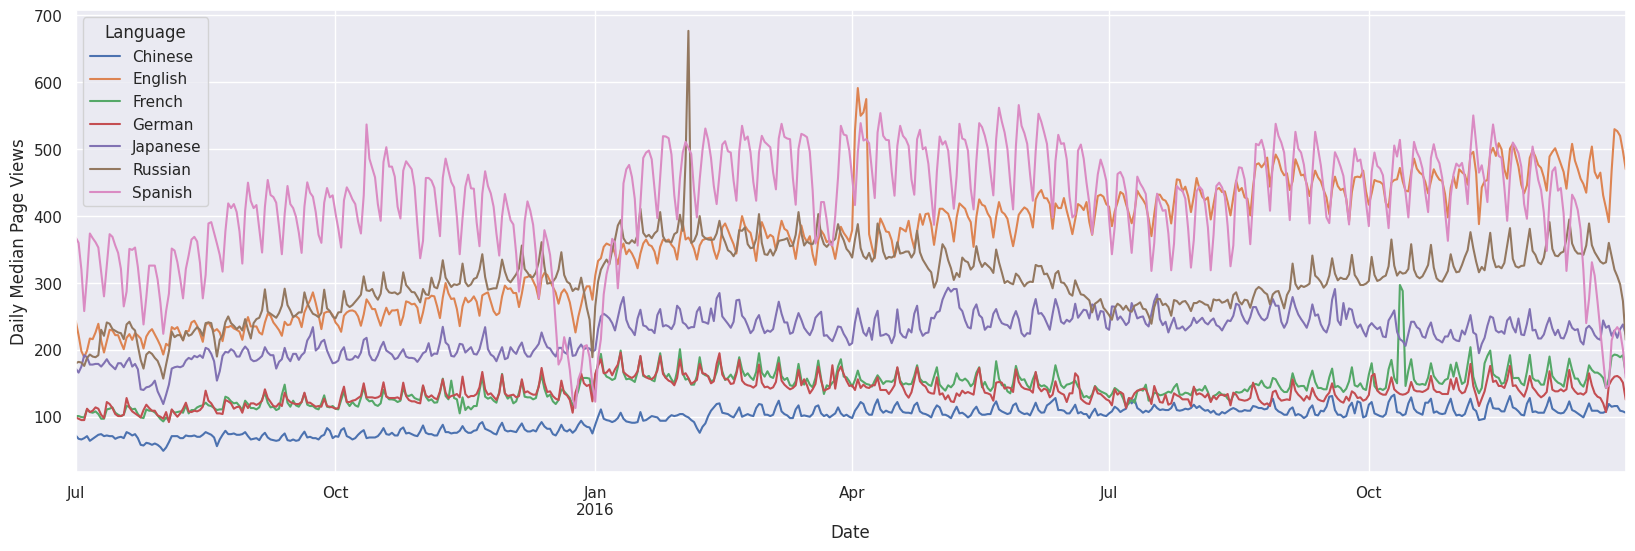

In [36]:
sns.set_theme()
agg_data_medians.plot()
plt.xlabel("Date")
plt.ylabel("Daily Median Page Views");

### Insights:
1. In daily median views, Spanish language pages seem to be higher than other language pages
2. Spanish, Russian, and English median daily views had a drop.
3. In later months of 2016, english pages median daily views is on part with that of Spanish

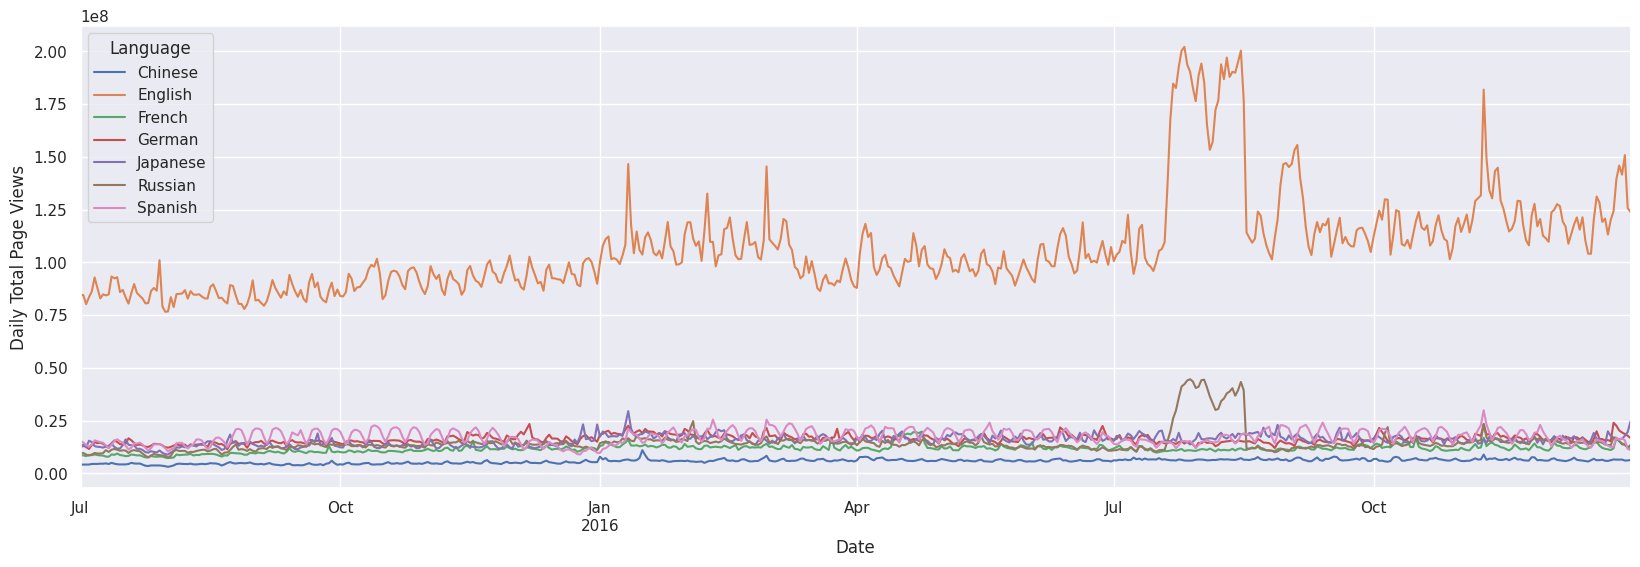

In [37]:
sns.set_theme()
agg_data_sum.plot()
plt.xlabel("Date")
plt.ylabel("Daily Total Page Views");

### Insights:
1. Given that English has high number of pages, it is no surprise that total daily views of English pages is high too
2. Daily total views of spanish seem to have some seasonality

In [38]:
# Null Hypothesis: Data is Not stationary
# Alternate Hypothesis: Data is stationary

import statsmodels.api as sm
def adFullerTest(data,alpha=0.05):

    """
    Given data series, outputs the result of adfuller test

    """
    testStatistic, p_value, *rest = sm.tsa.stattools.adfuller(data)

    if p_value < alpha:
        print(f"Signal is stationary:- p_value= {np.round(p_value,4)}")

    else:
        print(f"Signal is not stationary:- p_value= {np.round(p_value,4)}")

In [39]:
for language in agg_data_means.columns:
    print(language)
    adFullerTest(agg_data_means[language])
    print()

Chinese
Signal is not stationary:- p_value= 0.2328

English
Signal is not stationary:- p_value= 0.1071

French
Signal is stationary:- p_value= 0.0256

German
Signal is not stationary:- p_value= 0.115

Japanese
Signal is stationary:- p_value= 0.046

Russian
Signal is stationary:- p_value= 0.0015

Spanish
Signal is stationary:- p_value= 0.0331



### Insights:
1. Spanish, Russian, Japenese, French language series are stationary
2. English, German, Chinese are not stationary

### Further analysis on aggregated English data:

In [40]:
English = agg_data_means["English"].copy()

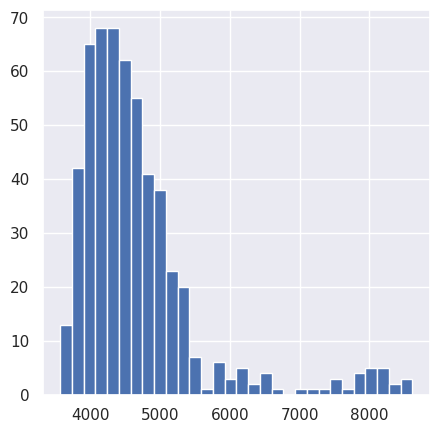

In [41]:
# Lets plot the histogram of English
plt.figure(figsize=(5,5))
English.hist(bins=30);

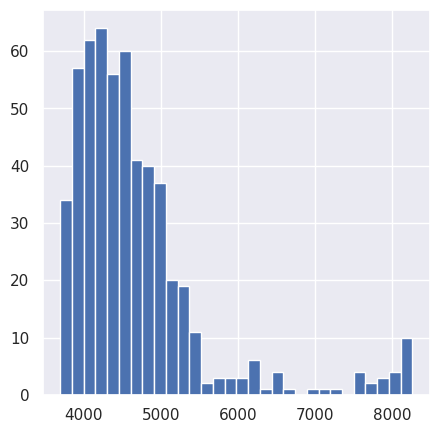

In [42]:
plt.figure(figsize=(5,5))
English_clipped = English.clip(lower=English.quantile(0.01),upper=English.quantile(0.99))
English_clipped.hist(bins=30);

`

### Insights:
1. Clipped the series using quantile technique with lower & upper quantiles as 0.01,0.99.
2. Looking at the plots, clipping seems optional

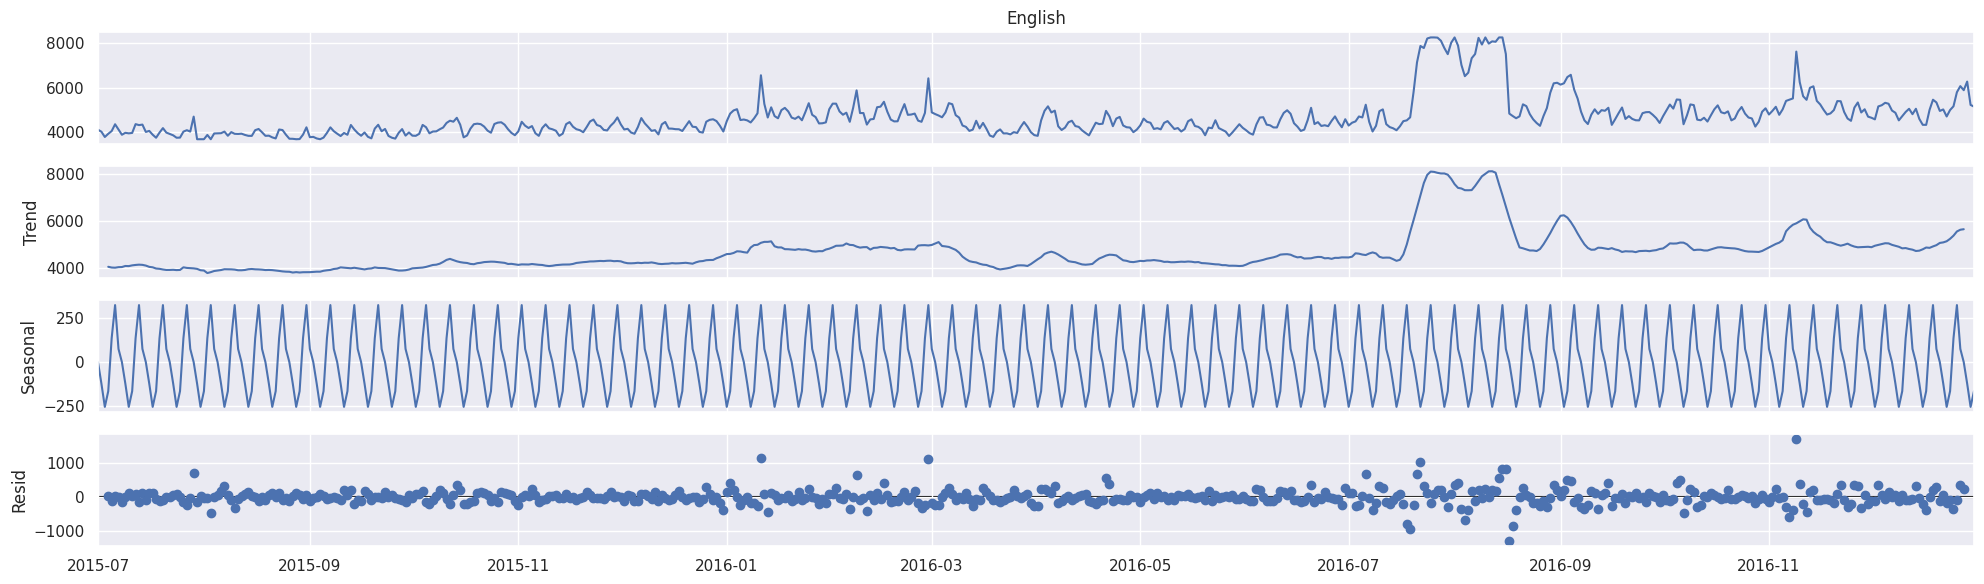

In [43]:
# Lets decompose the English signal further to understand trend, seasonality, residuals
decomp_english = sm.tsa.seasonal_decompose(English_clipped)
decomp_english.plot();

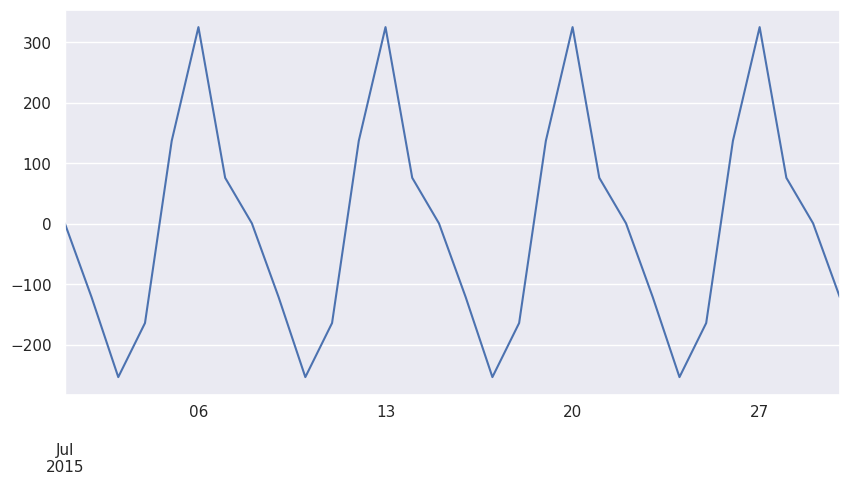

In [44]:
plt.figure(figsize=(10,5))
decomp_english.seasonal.head(30).plot();

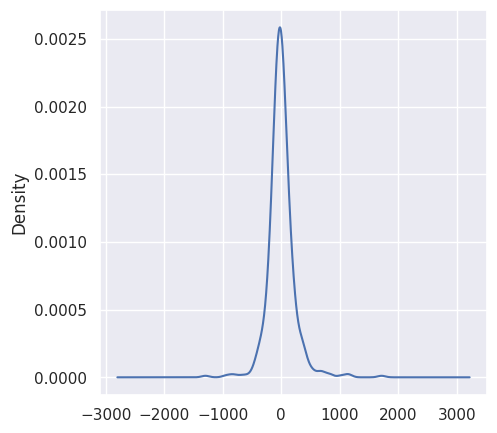

In [45]:
plt.figure(figsize=(5,5))
decomp_english.resid.plot(kind="kde");

### Insights:

1. Non stationary signals can be written as summation or multiplication of trend, seasonality, and residuals. As per the plots above, there is clearly seasonality in the data - Pattern repeats every 7 days. There is no clear Trend - increases, decreases, constant
2. Residual is normally distributed- No need to break down residual further

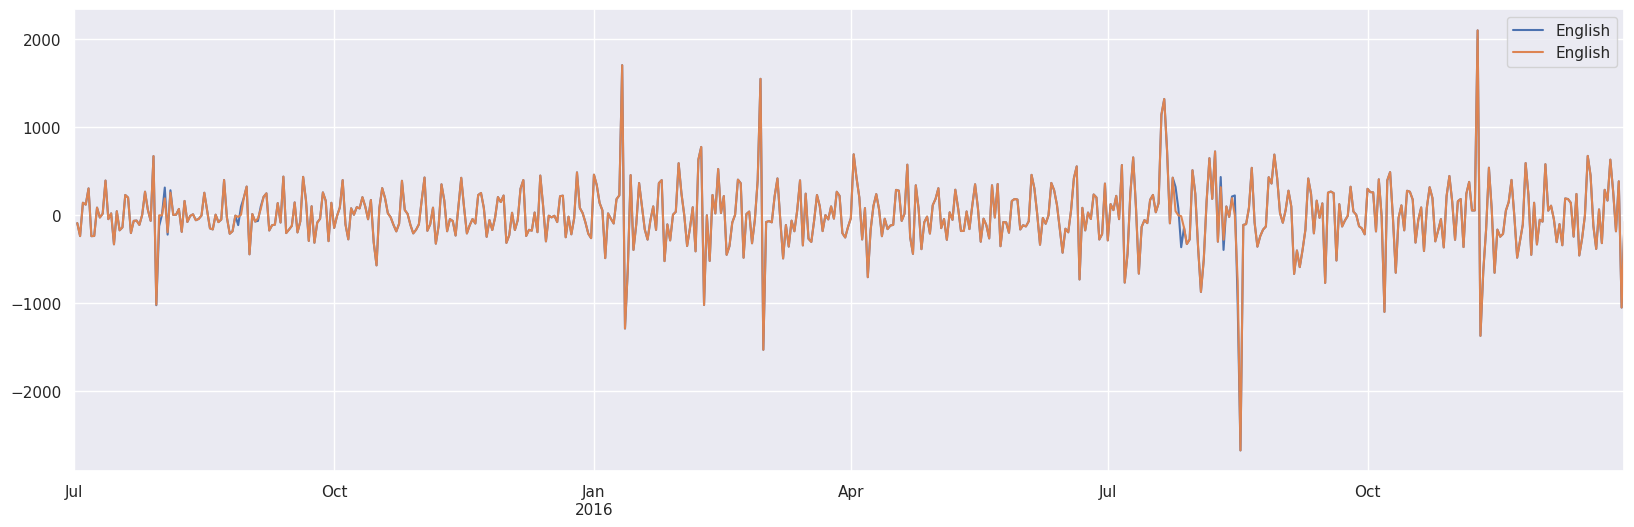

In [46]:
# Lets difference the data once to detrend
English.diff().plot()
English_clipped.diff().plot()
plt.legend();

In [47]:
# Check to see if the signal is stationary
adFullerTest(English_clipped.diff().dropna())

Signal is stationary:- p_value= 0.0


In [48]:
# Save the clipped data to different variable
Stationary_English_Clipped = English_clipped.diff().dropna()

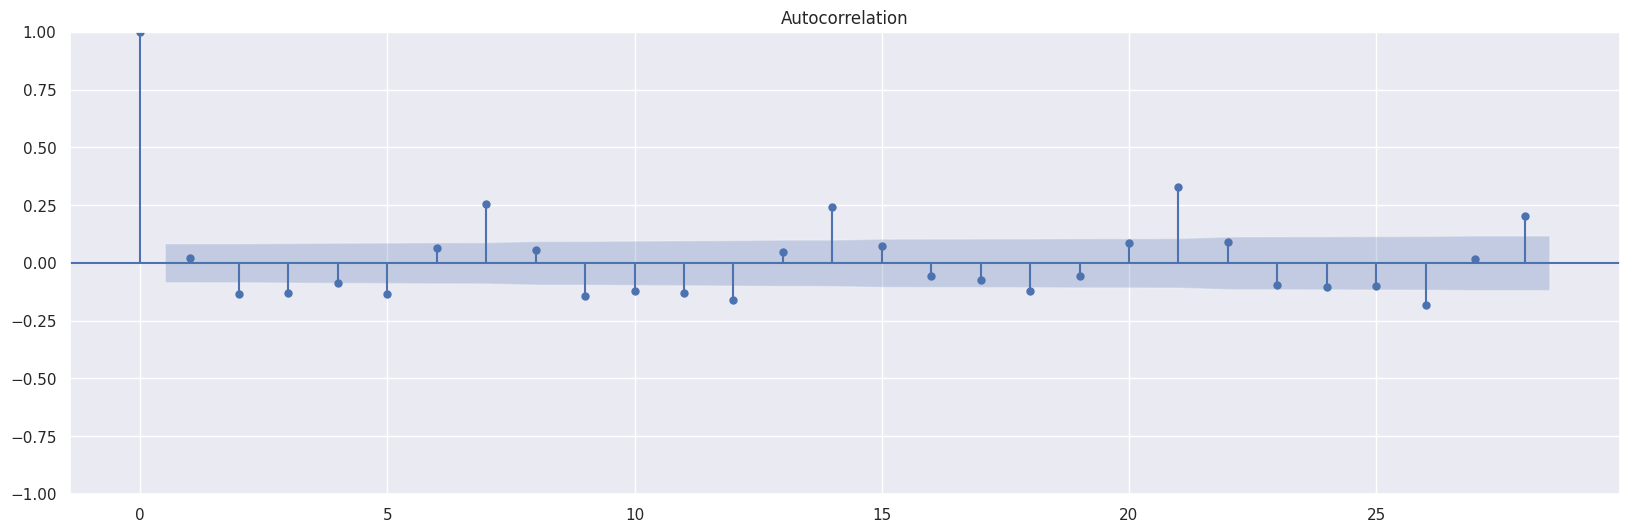

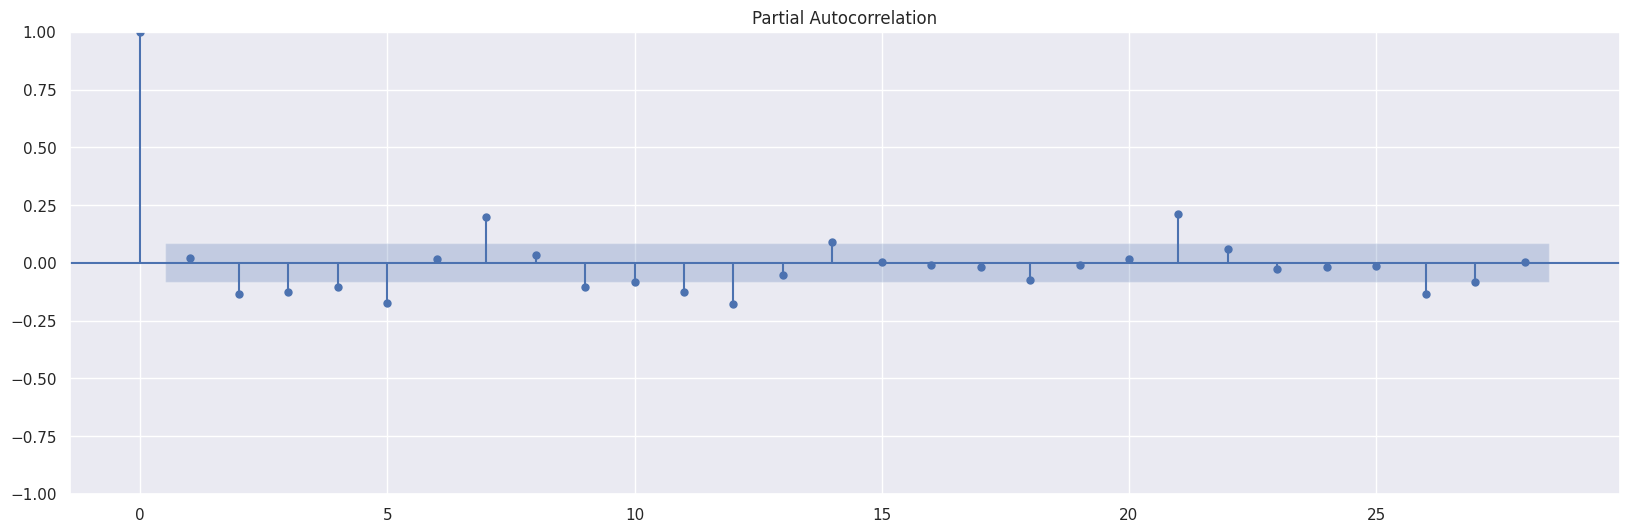

In [49]:
# Lets plot auto correlation & partial auto correlation plots

sm.tsa.graphics.plot_acf(Stationary_English_Clipped);
sm.tsa.graphics.plot_pacf(Stationary_English_Clipped);

### Insights:
1. In neither acf or pacf plot,s there is an exponential decaying trend. So, simple auto regression, or moving average wouldn't give better results
2. ARIMA, SARIMA, SARIMAX models would definitely do better than base models
3. You can observe, seasonality of 7 days in the above plots

In [50]:
import warnings
warnings.filterwarnings(action="ignore")

In [51]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Create a function to calculate all metrics
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

### Experimenting with differrent Modelling Techniques:

### Exponential Smoothing

In [52]:
X_train = English_clipped[English_clipped.index <= English_clipped.index[-35]]
X_test = English_clipped[English_clipped.index > English_clipped.index[-35]]

In [53]:
ExpModel = sm.tsa.ExponentialSmoothing(X_train,seasonal="add",trend="add")
ExpModel = ExpModel.fit()

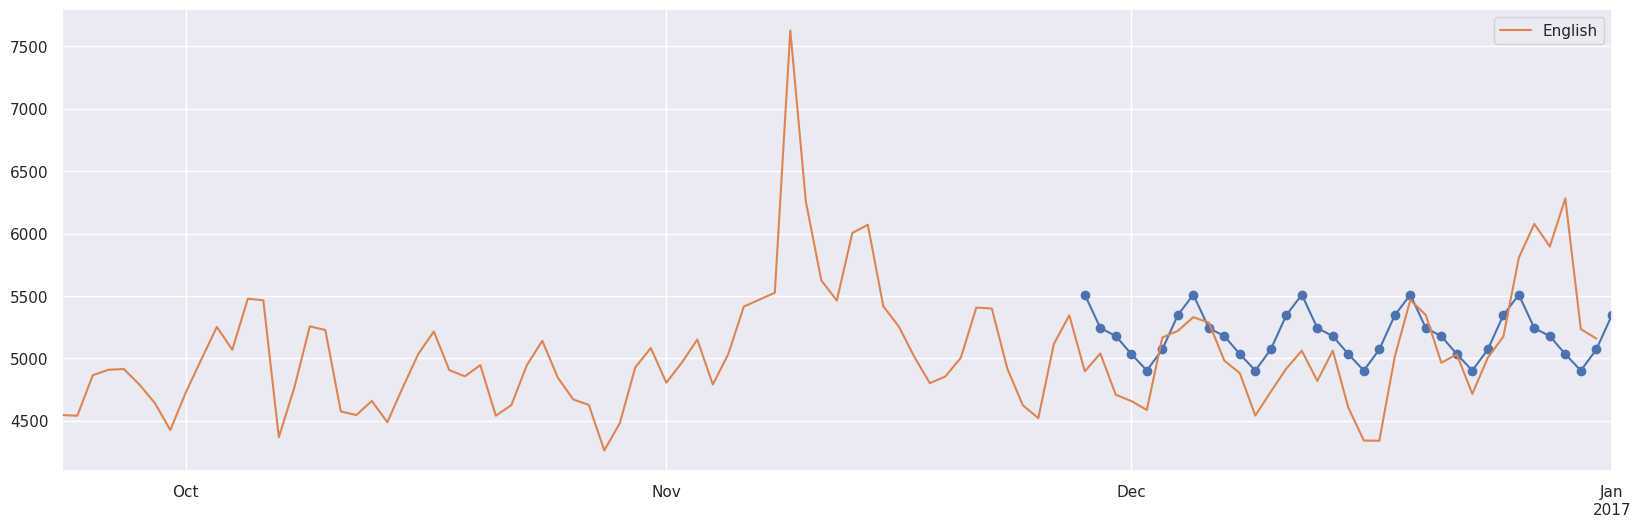

In [54]:
PredEnglish = ExpModel.forecast(35)
PredEnglish.plot(style='-o')
English_clipped.tail(100).plot()
plt.legend();

In [55]:
performance(English_clipped[-35:],PredEnglish)

MAE : 370.341
RMSE : 479.683
MAPE: 0.073


### Insights:
1. Exponential model is able to predict the data with an MAPE of ~7%.
2. Lets check futher to see if other models do any better

### ARIMA

In [56]:
def ARIMA(df,idx,order=(0,0,0),seasonal_order=(0,0,0,0)):

    import statsmodels.api as sm

    X_train, X_test = df.iloc[:-idx],df.iloc[-idx:]

    model = sm.tsa.ARIMA(endog=X_train,order=order,seasonal_order=seasonal_order)
    result = model.fit()

    predTest  = result.forecast(len(X_test))

    predTest.plot(style="-*",label="Prediction")
    df.tail(100).plot(label="Original")
    plt.ylabel("Views")
    plt.xlabel("Date")
    plt.legend();

    performance(X_test,predTest)
    print()

MAE : 342.994
RMSE : 443.572
MAPE: 0.068



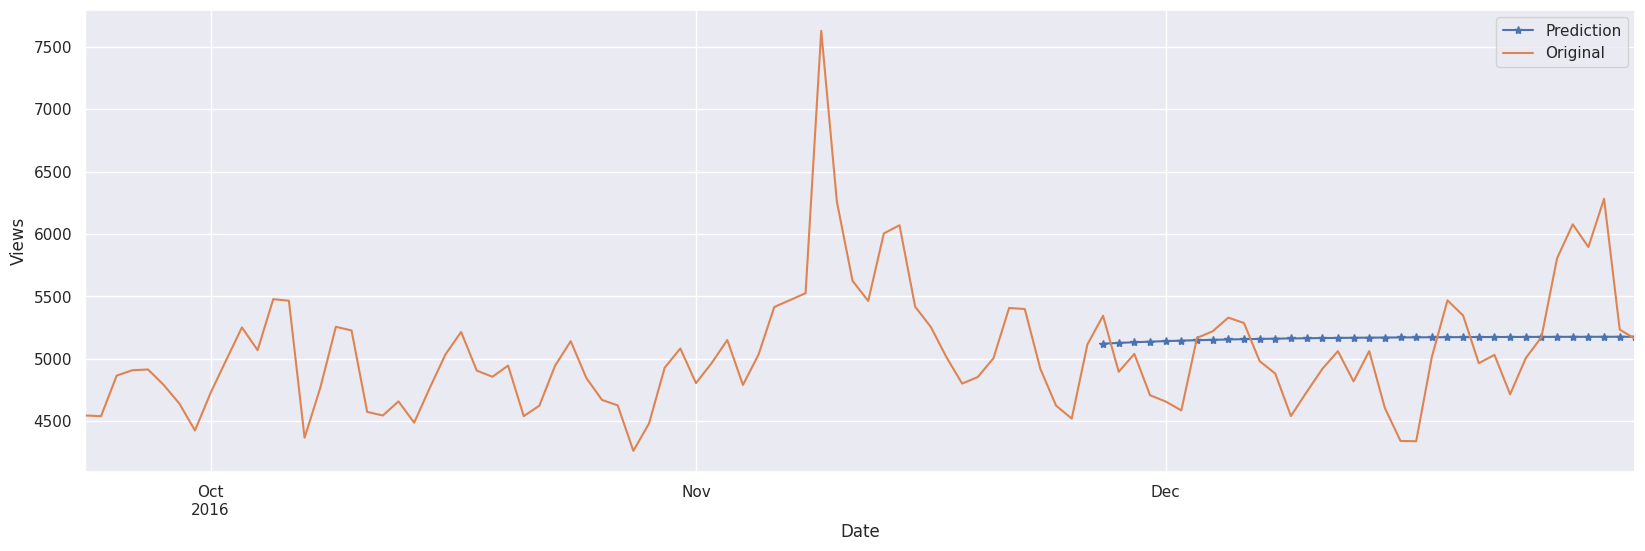

In [57]:
ARIMA(English_clipped,idx = 35,order=(1,1,1))

### Insights:
1. ARIMA with p,d,q as 1,1,1 is ableto predict the recent 35 days of data with ~6.8% MAPE

### SARIMAX

1. Below function can be used with and without exogeneous variable
2. Based on the order, seasonal_order, it can work as AR, MA, ARIMA, SARIMA, SARIMAX
3. Seasonal AutoRegressive Integrated Moving Average with Exogenous Regressors that use Moving average of errors, Auto regression on historical signal values, considers seasonality and external data to predict the future values

In [58]:
def SARIMAX(df,idx,order=(0,0,0),seasonal_order=(0,0,0,0),exog= None, batch=False):

    import statsmodels.api as sm

    X_train, X_test = df.iloc[:-idx],df.iloc[-idx:]

    if exog.shape[0]:
        exog_train = exog[:-idx]
        exog_test = exog[-idx:]

    model = sm.tsa.SARIMAX(endog=X_train,
                           exog=exog_train,
                           order=order,
                           seasonal_order=seasonal_order,
                          )
    result = model.fit(disp=False)
    predTest  = result.forecast(len(X_test),dynamic=False,exog=exog_test)

    if not batch:

        predTest.plot(style="-*",label="Prediction")
        df.tail(100).plot(label="Original")
        plt.ylabel("Views")
        plt.xlabel("Date")
        plt.legend();

        performance(X_test,predTest)

    return result.aic

MAE : 341.408
RMSE : 399.915
MAPE: 0.07


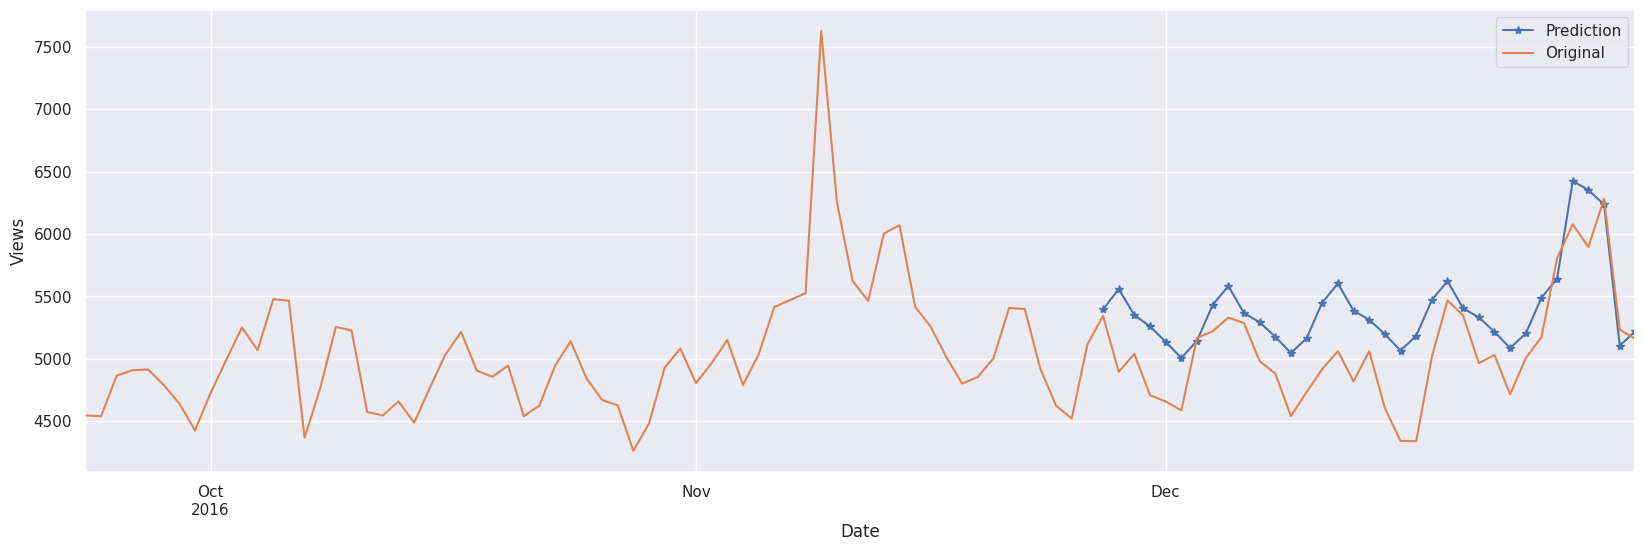

In [59]:
# Running with p,d,q  as 1,1,1; P,D,Q,m = 1,1,1,7
# To predict last 35 values
exog.index = English_clipped.index
SARIMAX(df=English_clipped,idx=35,order=(1,1,1),seasonal_order=(1,1,1,7),exog=exog,batch=False);

### Insights:
1. With p,d,q and P,D,Q,m as 1,1,1 and 1,1,1,7, we got a model that predicts with an MAPE of 7%
2. We can do a grid search on above parameters to find the optimal p,d,q,P,D,Q values

In [60]:
from itertools import product
from pprint import pprint
import heapq

In [61]:
 def SARIMAX_mape(df,idx,order=(0,0,0),seasonal_order=(0,0,0,0),exog= None, batch=False):

    import statsmodels.api as sm

    X_train, X_test = df.iloc[:-idx],df.iloc[-idx:]

    if exog is not None:
        exog_train = exog[:-idx]
        exog_test = exog[-idx:]
    else:
        exog_train,exog_test =  None,None

    model = sm.tsa.SARIMAX(endog=X_train,
                           exog=exog_train,
                           order=order,
                           seasonal_order=seasonal_order,
                          )
    result = model.fit(disp=False)
    predTest  = result.forecast(len(X_test),dynamic=False,exog=exog_test)

    if not batch:

        predTest.plot(style="-*",label="Prediction")
        df.tail(100).plot(label="Original")
        plt.ylabel("Views")
        plt.xlabel("Date")
        plt.legend();

        performance(X_test,predTest)

    mape_val = round(mape(X_test, predTest), 3)

    return mape_val

In [62]:
# This grid search is for English series with exogenous variable
# Based on how it works, we can replicate it to other languages

p = d = q = range(1,3)

#Using product to create all permuatations of p,d,q,P,D,Q
pdq = list(product(p,d,q))
PDQ = [(x[0],x[1],x[2],7) for x in pdq]

all_results_mape = []

for order in pdq:
    for seasonal in PDQ:

        try:
            # MAPE is stored in the result
            result = SARIMAX_mape(df=English_clipped,
                             idx=35,order= order,seasonal_order=seasonal,exog=exog,batch=True);


            all_results_mape.append((order,seasonal,-result))
            print(order,seasonal,result)

        except:
            print(f"Skipped {order},{seasonal}")
            continue

# We store the MAPE values as negative to use nlargest function to find the best parameters
top5_results_mape = heapq.nlargest(5, all_results_mape,lambda k:k[2])
print(top5_results_mape)

(1, 1, 1) (1, 1, 1, 7) 0.07
(1, 1, 1) (1, 1, 2, 7) 0.068
(1, 1, 1) (1, 2, 1, 7) 0.045
(1, 1, 1) (1, 2, 2, 7) 0.165
(1, 1, 1) (2, 1, 1, 7) 0.077
(1, 1, 1) (2, 1, 2, 7) 0.067
(1, 1, 1) (2, 2, 1, 7) 0.069
(1, 1, 1) (2, 2, 2, 7) 0.047
(1, 1, 2) (1, 1, 1, 7) 0.061
(1, 1, 2) (1, 1, 2, 7) 0.061
(1, 1, 2) (1, 2, 1, 7) 0.053
(1, 1, 2) (1, 2, 2, 7) 0.06
(1, 1, 2) (2, 1, 1, 7) 0.069
(1, 1, 2) (2, 1, 2, 7) 0.069
(1, 1, 2) (2, 2, 1, 7) 0.065
(1, 1, 2) (2, 2, 2, 7) 0.09
(1, 2, 1) (1, 1, 1, 7) 0.063
(1, 2, 1) (1, 1, 2, 7) 0.07
(1, 2, 1) (1, 2, 1, 7) 0.047
(1, 2, 1) (1, 2, 2, 7) 0.061
(1, 2, 1) (2, 1, 1, 7) 0.07
(1, 2, 1) (2, 1, 2, 7) 0.071
(1, 2, 1) (2, 2, 1, 7) 0.063
Skipped (1, 2, 1),(2, 2, 2, 7)
(1, 2, 2) (1, 1, 1, 7) 0.07
(1, 2, 2) (1, 1, 2, 7) 0.07
(1, 2, 2) (1, 2, 1, 7) 0.044
(1, 2, 2) (1, 2, 2, 7) 0.284
(1, 2, 2) (2, 1, 1, 7) 0.059
(1, 2, 2) (2, 1, 2, 7) 0.072
(1, 2, 2) (2, 2, 1, 7) 0.072
Skipped (1, 2, 2),(2, 2, 2, 7)
(2, 1, 1) (1, 1, 1, 7) 0.064
(2, 1, 1) (1, 1, 2, 7) 0.063
(2, 1, 1) (1, 2, 

MAE : 224.313
RMSE : 291.266
MAPE: 0.044


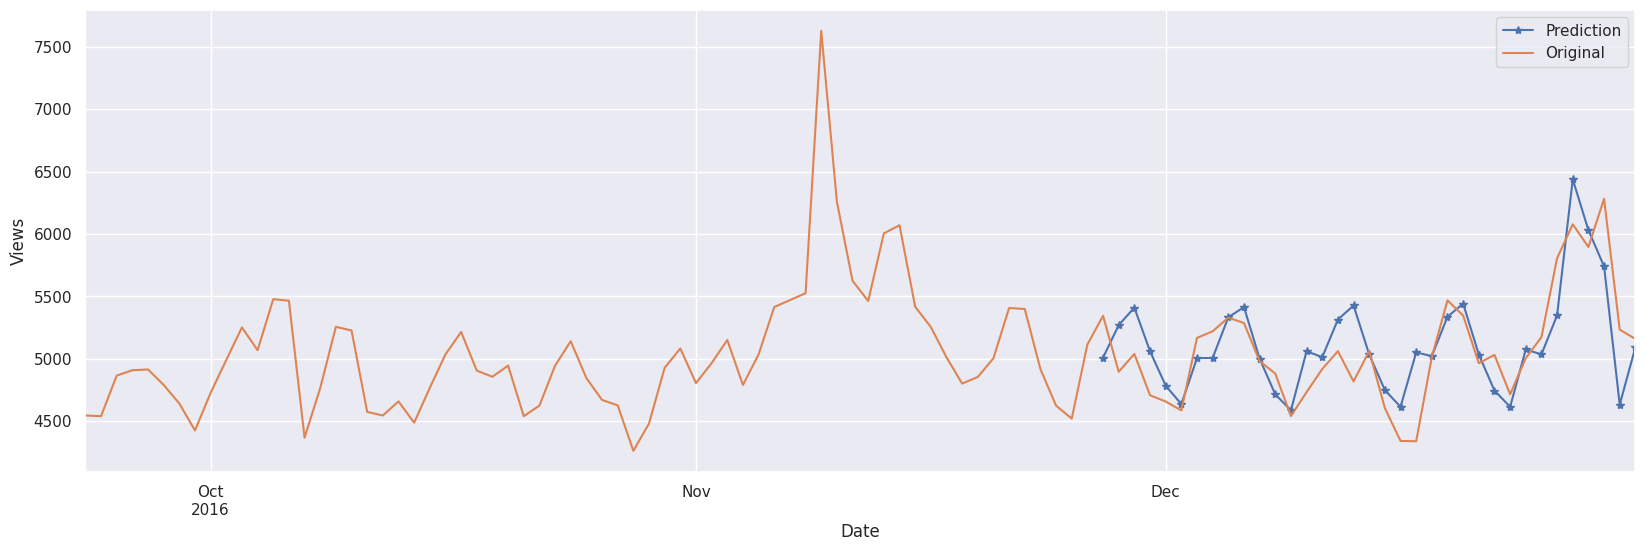

In [63]:
# From the above grid search results- selected the best parameters
SARIMAX_mape(df=English_clipped,idx=35,order=(1,2,2),seasonal_order=(1,2,1,7),exog=exog,batch=False);

### Insights:
1. Using grid search, we could find optimal parameters that predicts with an MAPE of 4.4%. Better than our prior models

In [64]:
# Pipeline function for different languages

# 1. Dataset is available in agg_data_means[language]
# 2. Function to call Grid Search on SARIMA - EXOG is not passed
# 3. Store top 5 results for each language in Dictionary

def grid_search_sarimax(df, p, d, q, m, exog=None, idx=35):

    p,d,q = p,d,q
    pdq = list(product(p,d,q))
    PDQ = [(x[0],x[1],x[2],m) for x in pdq]

    all_results_mape = []

    for order in pdq:
        for seasonal in PDQ:

            try:
                result = SARIMAX_mape(df=df,
                                 idx=idx,order= order,seasonal_order=seasonal,exog=exog,batch=True);


                all_results_mape.append((order,seasonal,-result))
                print(f"order:{order},seasonal:{seasonal},MAPE:{result}")

            except:
                print(f"Skipped params: {order},{seasonal}")
                continue


    top5_results_mape = heapq.nlargest(5, all_results_mape,lambda k:k[2])
    return top5_results_mape

top5results_by_lang = {}

# for different languages
for language in agg_data_means.columns:

    # Dataset is available in agg_data_means[language]
    df_lang = f"df_{language}"
    df_lang = agg_data_means[language]


    # Call Grid Search
    print(f"Language:{language}")
    output = grid_search_sarimax(df_lang, p=range(1,3), d=range(1,3), q=range(1,3), m=7, exog=None, idx=35)
    top5results_by_lang[language] = output

pprint(top5results_by_lang)

Language:Chinese
order:(1, 1, 1),seasonal:(1, 1, 1, 7),MAPE:0.086
order:(1, 1, 1),seasonal:(1, 1, 2, 7),MAPE:0.086
order:(1, 1, 1),seasonal:(1, 2, 1, 7),MAPE:0.073
order:(1, 1, 1),seasonal:(1, 2, 2, 7),MAPE:0.07
order:(1, 1, 1),seasonal:(2, 1, 1, 7),MAPE:0.086
order:(1, 1, 1),seasonal:(2, 1, 2, 7),MAPE:0.086
Skipped params: (1, 1, 1),(2, 2, 1, 7)
order:(1, 1, 1),seasonal:(2, 2, 2, 7),MAPE:0.05
order:(1, 1, 2),seasonal:(1, 1, 1, 7),MAPE:0.086
order:(1, 1, 2),seasonal:(1, 1, 2, 7),MAPE:0.087
order:(1, 1, 2),seasonal:(1, 2, 1, 7),MAPE:0.073
order:(1, 1, 2),seasonal:(1, 2, 2, 7),MAPE:0.038
order:(1, 1, 2),seasonal:(2, 1, 1, 7),MAPE:0.086
order:(1, 1, 2),seasonal:(2, 1, 2, 7),MAPE:0.086
order:(1, 1, 2),seasonal:(2, 2, 1, 7),MAPE:0.09
order:(1, 1, 2),seasonal:(2, 2, 2, 7),MAPE:0.05
order:(1, 2, 1),seasonal:(1, 1, 1, 7),MAPE:0.152
order:(1, 2, 1),seasonal:(1, 1, 2, 7),MAPE:0.153
order:(1, 2, 1),seasonal:(1, 2, 1, 7),MAPE:0.266
order:(1, 2, 1),seasonal:(1, 2, 2, 7),MAPE:846440.579
order:(1, 2,

### Chinese:

MAE : 11.464
RMSE : 14.449
MAPE: 0.031


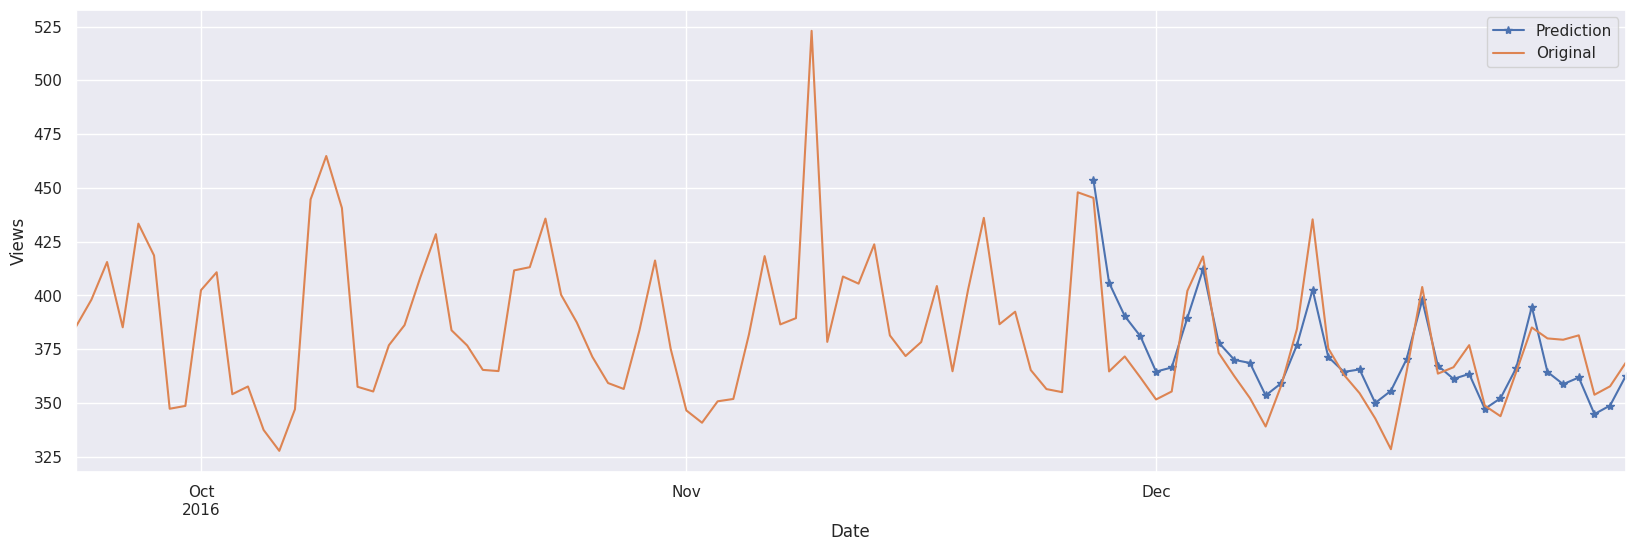

In [65]:
order, seasonal = (2,1,1),(2,2,2,7)
SARIMAX_mape(df=agg_data_means["Chinese"],idx=35,order= order,seasonal_order=seasonal,exog=None,batch=False);

## English:

MAE : 305.305
RMSE : 452.232
MAPE: 0.058


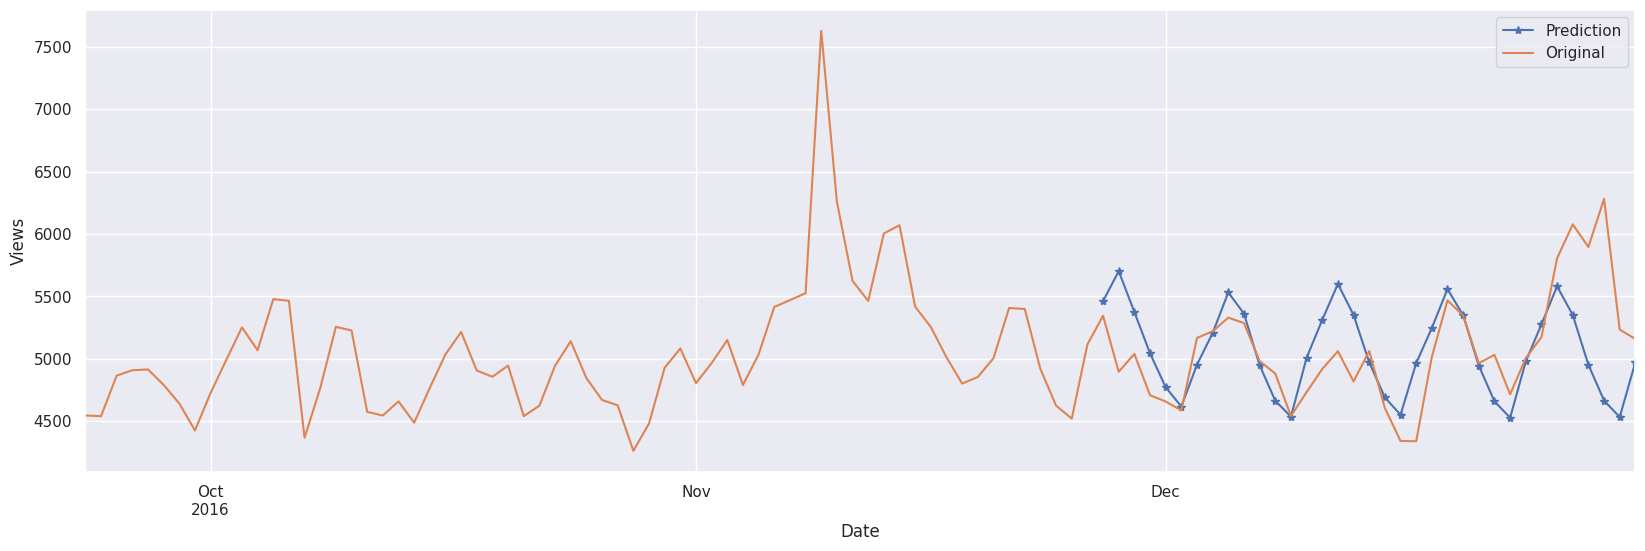

In [66]:
order, seasonal = (1,2,2),(1,2,1,7)
SARIMAX_mape(df=agg_data_means["English"],idx=35,order= order,seasonal_order=seasonal,exog=None,batch=False);

## German:

MAE : 70.043
RMSE : 115.873
MAPE: 0.067


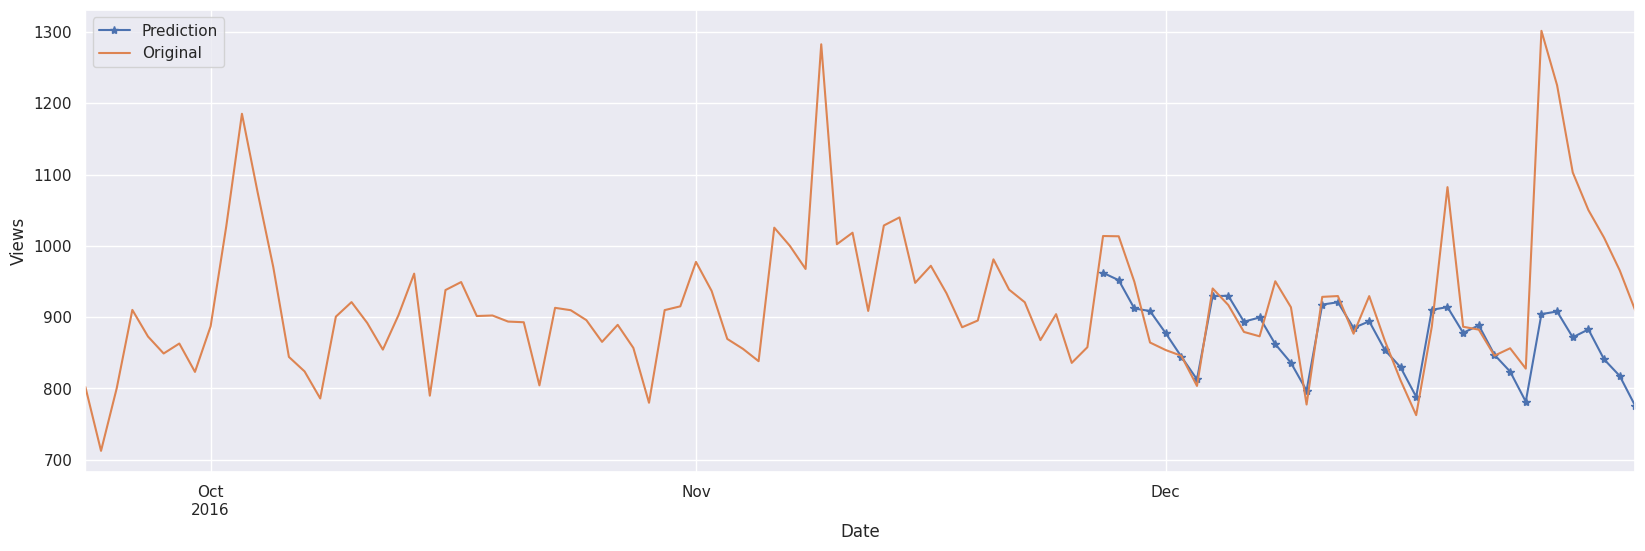

In [67]:
order, seasonal = (1,1,1),(2,2,2,7)
SARIMAX_mape(df=agg_data_means["German"],idx=35,order= order,seasonal_order=seasonal,exog=None,batch=False);

## Japanese:

MAE : 815.444
RMSE : 821.553
MAPE: 1.0


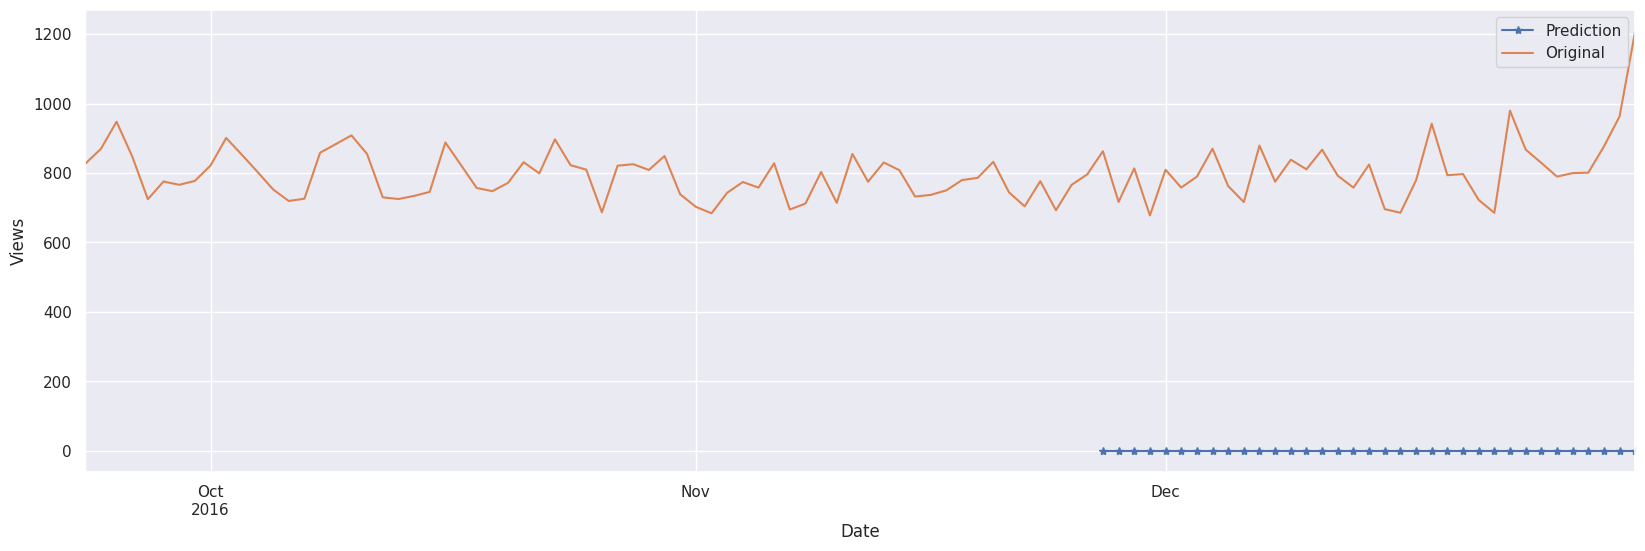

In [68]:
order, seasonal = (1,2,2),(2,2,1,7)
SARIMAX_mape(df=agg_data_means["Japanese"],idx=35,order= order,seasonal_order=seasonal,exog=None,batch=False);

## Russian:

MAE : 56.949
RMSE : 69.193
MAPE: 0.059


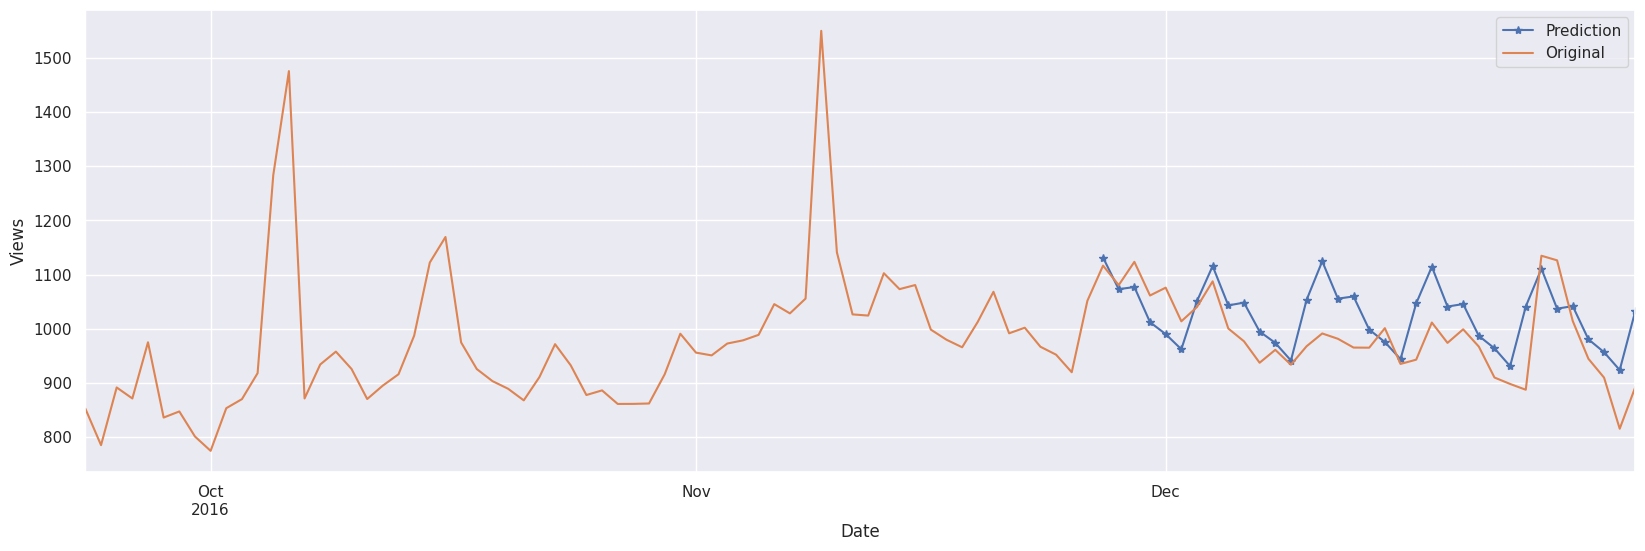

In [69]:
order, seasonal = (2,1,1),(1,2,1,7)
SARIMAX_mape(df=agg_data_means["Russian"],idx=35,order= order,seasonal_order=seasonal,exog=None,batch=False);

## Spanish

MAE : 92.815
RMSE : 112.812
MAPE: 0.088


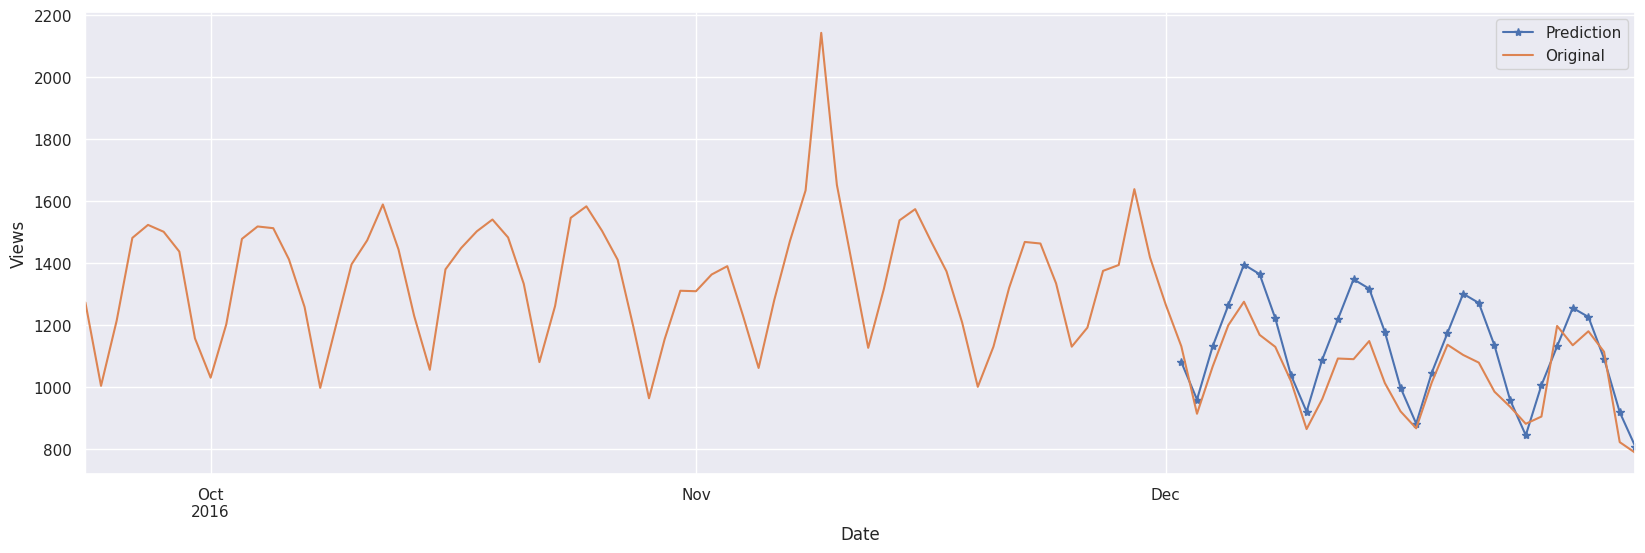

In [70]:
# For spanish, predicting last month worked better compared to predicting last 35 days
order, seasonal = (1,1,0),(1,0,1,7)
SARIMAX_mape(df=agg_data_means["Spanish"],idx=30,order= order,seasonal_order=seasonal,exog=None,batch=False);

### Insights:
1. As shown above, average pages views for each language are predicted using the best parameters from Grid Search on SARIMAX without exogenous variable
2. MAPE of English increased by ~2% without inclusion of campaign data during training
3. For Spanish, we did well in prediction of last 30 days than last 35 days

## Prophet

In [71]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [72]:
# prepare the data for using prophet
prophet_input = English_clipped.reset_index().rename(columns={"index":"ds","English":"y"})
train_data,test_data = prophet_input.iloc[:-35],prophet_input.iloc[-35:]

In [73]:
# Trying to predict with 95% confidence intervals
fbmodel = Prophet(weekly_seasonality=True,interval_width=0.95)
fbmodel.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd0lasvi3/t5jjvalw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd0lasvi3/9rhh8t97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75846', 'data', 'file=/tmp/tmpd0lasvi3/t5jjvalw.json', 'init=/tmp/tmpd0lasvi3/9rhh8t97.json', 'output', 'file=/tmp/tmpd0lasvi3/prophet_modeli3nzpkvj/prophet_model-20250418041935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:19:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:19:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [74]:
# This is to create timeseries dataframe automatically
forecast_period = fbmodel.make_future_dataframe(periods=35,freq="D",include_history=True)

In [75]:
# Store the forecast
prophet_forecast = fbmodel.predict(forecast_period)

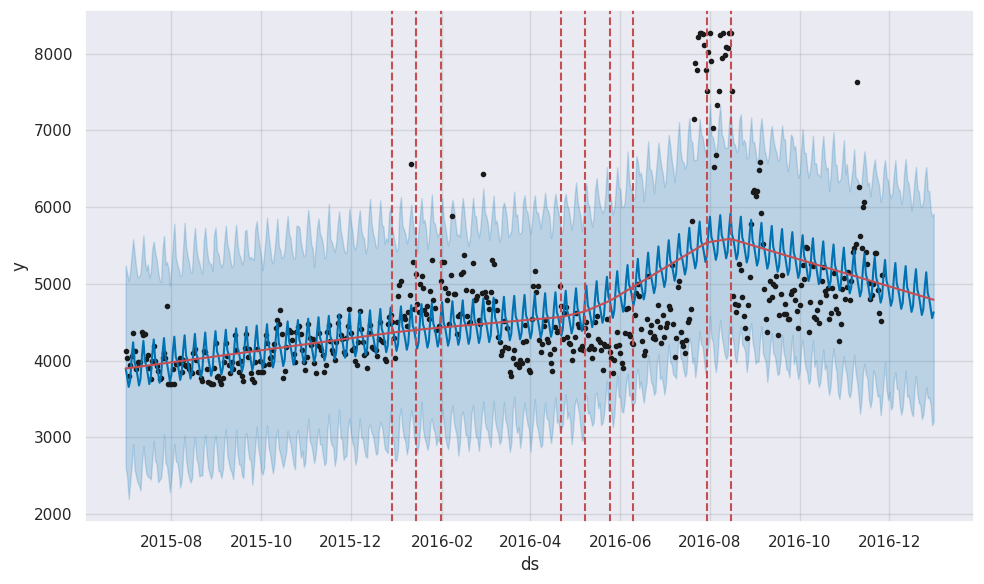

In [76]:
# Plot the changepoints, forecast along with confidence interval
fig = fbmodel.plot(prophet_forecast,uncertainty=True)
a = add_changepoints_to_plot(fig.gca(),fbmodel,prophet_forecast)

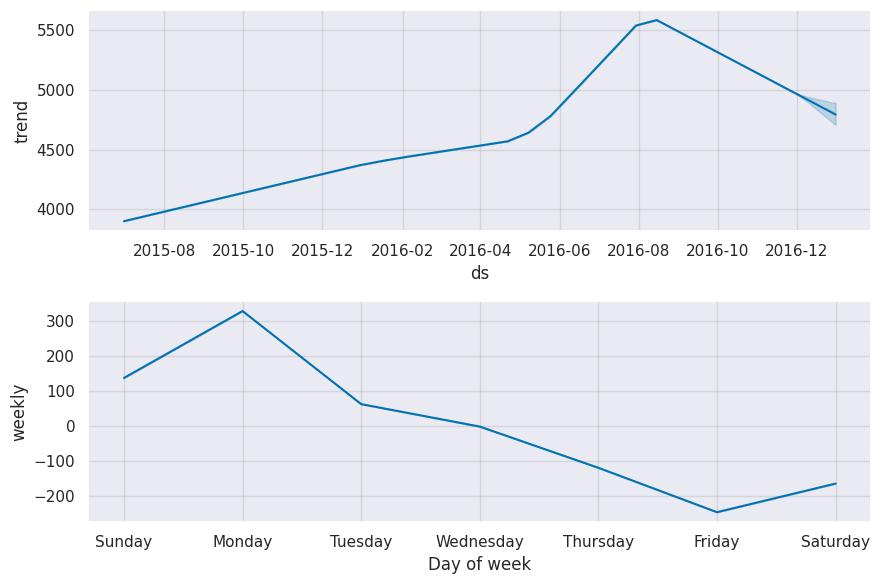

In [77]:
# As expected, prophet could find trend and weekly seasonality
fbmodel.plot_components(prophet_forecast);

In [78]:
# Check how prophet did
performance(test_data["y"].values,prophet_forecast["yhat"][-35:].values)

MAE : 323.508
RMSE : 472.786
MAPE: 0.06


### Insights:
1. Without exogenous variables and not much tweaking, it was able to find a model that predicts average daily pages views with MAPE of ~5.9%

## Prophet with campaign data

In [79]:
# prepare the data for using prophet
prophet_input = English_clipped.reset_index().rename(columns={"index":"ds","English":"y"})
prophet_input = prophet_input.merge(exog.reset_index(drop=True),left_index=True,right_index=True)
train_data,test_data = prophet_input.iloc[:-35],prophet_input.iloc[-35:]

In [80]:
# Trying to predict with 95% confidence intervals
fbmodel2 = Prophet(weekly_seasonality=True,interval_width=0.95)
fbmodel2.add_regressor("Exog")
fbmodel2.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd0lasvi3/zco2yeyv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd0lasvi3/d3y91fsx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42661', 'data', 'file=/tmp/tmpd0lasvi3/zco2yeyv.json', 'init=/tmp/tmpd0lasvi3/d3y91fsx.json', 'output', 'file=/tmp/tmpd0lasvi3/prophet_modelkrbmdkiv/prophet_model-20250418041936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:19:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [81]:
# Store the forecast
prophet_forecast2 = fbmodel2.predict(prophet_input)

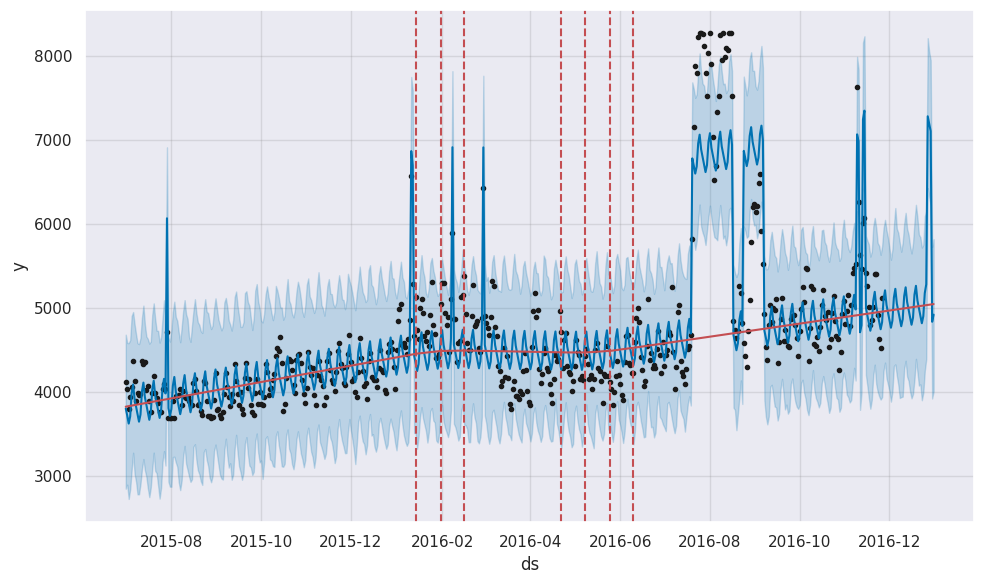

In [82]:
# Plot the changepoints, forecast along with confidence interval
fig = fbmodel2.plot(prophet_forecast2,uncertainty=True)
a = add_changepoints_to_plot(fig.gca(),fbmodel2,prophet_forecast2)

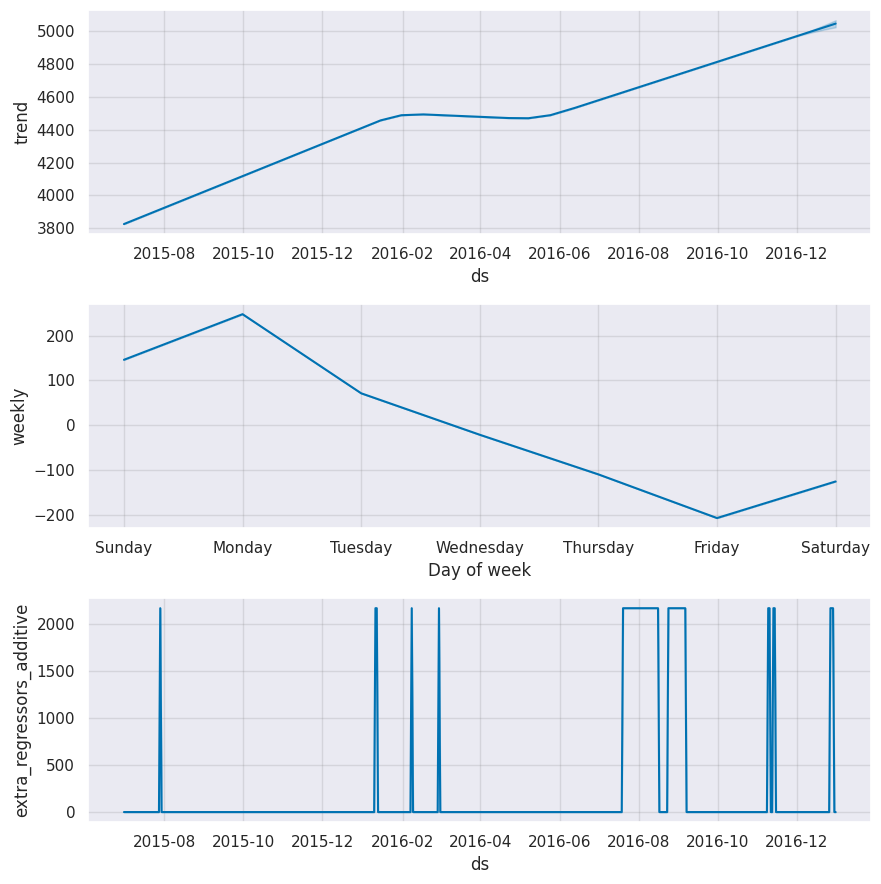

In [83]:
fbmodel2.plot_components(prophet_forecast2);

In [84]:
performance(test_data["y"].values,prophet_forecast2["yhat"][-35:].values)

MAE : 279.927
RMSE : 404.193
MAPE: 0.053


### Insights:
1. Prophet with campain data is able to predict better. MAPE of ~5%

## Inferences :

1. There are also mediawiki & commons.wikimedia pages that host media are available in the dataset
2. Of the pages from 7 different languages, English has the highest proportion, closely followed by Japanese. Rest of the languages roughly have same proportion of ~12%
3. AccessOrigin is spider for ~24% of the pages and all-agents for ~76%
4. AccessType is all-acess for about 50% of the pages. Then for desktop & mobile-web is ~25% each
6. During the months of August 2016, there is a spike in daily average views of both English & Russian pages
7. Also, a spike is observed in Nov,2016. This time for pages in Spanish, Russian, and German as well
8. English average views seem to have trend & seasonality where as other languages have seasonality mostly
9. In daily median views, Spanish language pages seem to be higher than other language pages
10. Spanish, Russian, and English median daily views had a drop.
11. In later months of 2016, english pages median daily views is on part with that of Spanish

## Recommendations:
1. English has high average daily views compared to other languages. Recommend running more ads in English pages
2. There are more than 50% of pages with all-access compared to desktop & mobile-web alone
3. Knowing the language for mediawiki & commons.wikimedia would enhance our training data further
4. Like campaign data for English pages, availability of such exogenous data would improve model predictions
5. With more time and resources, we can experiment with prophet parameters to bring better MAPE values.  
